# ML Open Challenge

# Looking into the data

In [4]:
#Importing Pandas library  
import pandas as pd
#Importing Numpy library  
import numpy as np

In [12]:
#Reading train file and test file into pandas (train=data)
data=pd.read_csv('D:/datasets/openchallenge.csv')

In [13]:
#Finding the shape of test file
data.shape

(2227, 3)

In [14]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [15]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [16]:
import seaborn as sns


## finding the null values

In [17]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

# we have nearly less than 0.3 percent of null value of data so we droped that null values

In [18]:
data=data.dropna()

In [19]:
data.columns

Index(['x1', 'x2', 'y'], dtype='object')

# Outlier treatment- 'zero' imputation

<AxesSubplot:xlabel='x1'>

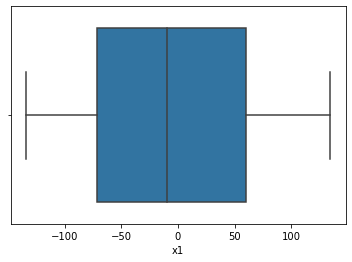

In [20]:
sns.boxplot(x='x1',data=data)

<AxesSubplot:xlabel='x2'>

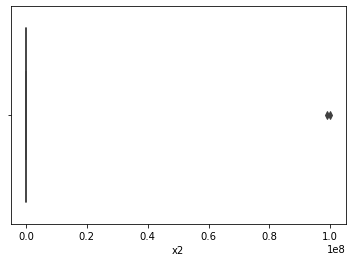

In [21]:
sns.boxplot(x='x2',data=data)

In [22]:
import numpy as np
out=[]
def iqr_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in data:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(data['x1'])

Outliers: []


In [24]:
import numpy as np
out=[]
def iqr_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in data:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(data['x2'])

Outliers: [99009998.0, 99999999.0]


In [28]:
#Zero value imputation
q1 = data['x2'].quantile(0.25)
q3 = data['x2'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in data['x2']:
    if i > Upper_tail or i < Lower_tail:
            data['x2'] = data['x2'].replace(i, 0)

C:\Users\Harikrishna\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x2'>

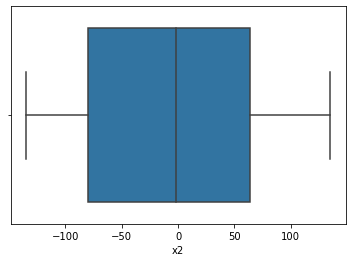

In [29]:
sns.boxplot(data['x2'])

In [30]:
data['y'].value_counts()

0    1238
1     981
Name: y, dtype: int64

# Train-Test split

In [31]:
X = data.drop('y',axis = 1)#X=data

In [32]:
y= data['y']

In [33]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(2219, 2)


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(standardized_data,y,train_size=0.8,random_state=0)

In [36]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1775, 2) (1775,)
(444, 2) (444,)


# Checking the Logistic model

<h5>Hyper-parameter tuning</h5>

In [37]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
tuned_parameters = [{'C':[1, 2, 3, 4, 5,6,7,8,9], 'penalty':['l2','l1','l3']}]
acc = ['accuracy','precision','recall']                    
for i in acc:                   
    clf = RandomizedSearchCV( LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)
    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'penalty': 'l2', 'C': 5}
LogisticRegression(C=5)
0.7477477477477478
Best parameters set found on train set:
for precision
{'penalty': 'l2', 'C': 9}
LogisticRegression(C=9)
1.0
Best parameters set found on train set:
for recall
{'penalty': 'l2', 'C': 8}
LogisticRegression(C=8)
0.44554455445544555


<h5>Training the model</h5>

In [40]:
classifier = LogisticRegression(penalty='l2',C=8)
classifier.fit(x_train, y_train)

LogisticRegression(C=8)

<h5>Predict</h5>

In [41]:
y_test_predict=classifier.predict(x_test)

In [42]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [43]:
temp_data.head()

,y_test,y_test_pred
1375,0,0
101,1,1
1281,0,0
579,1,0
40,1,1


<h5> Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve</h5>

In [44]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.7477477477477478
1.0
0.7227722772277227
0.6164383561643836
0.44554455445544555


In [45]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[242,   0],
       [112,  90]], dtype=int64)

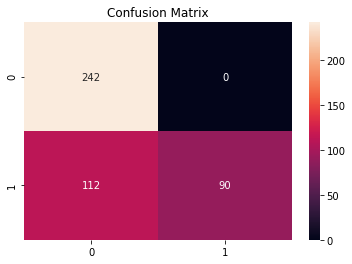

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Checking the KNN model

<h5>Hyper-parameter tuning</h5>

In [47]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [48]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5,6,7,8,9,10], 'p':[1, 2, 3]}]
acc = ['accuracy','precision','recall']                    
for i in acc: 
    clf = RandomizedSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)

    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'p': 2, 'n_neighbors': 6}
KNeighborsClassifier(n_neighbors=6)
0.9527027027027027
Best parameters set found on train set:
for precision
{'p': 3, 'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4, p=3)
0.9591836734693877
Best parameters set found on train set:
for recall
{'p': 2, 'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)
0.9455445544554455


<h5>Training the model </h5>

In [49]:
classifier = KNeighborsClassifier(n_neighbors=4,p=1)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

<h5>Predict</h5>

In [50]:
y_test_predict=classifier.predict(x_test)

In [51]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [52]:
temp_data.head()

,y_test,y_test_pred
1375,0,0
101,1,1
1281,0,0
579,1,1
40,1,1


<h5>Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve
</h5>

In [53]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.9504504504504504
0.9591836734693877
0.9488176090336305
0.9447236180904524
0.9306930693069307


In [54]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[234,   8],
       [ 14, 188]], dtype=int64)

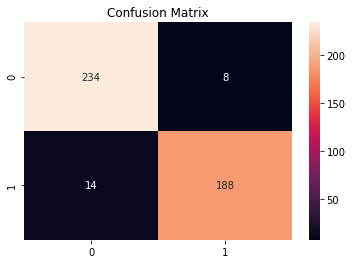

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Checking the DECISION TREE model

<h5>Hyper-parameter tuning</h5>

In [56]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Creating the hyperparameter grid  
evaluation_metric=['accuracy','precision']
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
# Instantiating RandomizedSearchCV object
for i in evaluation_metric:
  tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5,scoring='{}'.format(i))
  print('for {}'.format(i))
  tree_cv.fit(x_train, y_train) 
# Print the tuned parameters and score 
  print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
  print("Best score is {}".format(tree_cv.best_score_))

for accuracy
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3}
Best score is 0.6980281690140846
for precision
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3}
Best score is 0.9226290299903486


<h5>Training the model</h5>

In [58]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=2,min_samples_leaf=7)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features=2, min_samples_leaf=7)

<h5>Predict</h5>

In [59]:
y_test_predict=classifier.predict(x_test)

In [60]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [61]:
temp_data.head()

,y_test,y_test_pred
1375,0,0
101,1,1
1281,0,0
579,1,1
40,1,1


<h5>Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve</h5>

In [62]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.9301801801801802
0.9090909090909091
0.9310408313558629
0.924574209245742
0.9405940594059405


In [63]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[223,  19],
       [ 12, 190]], dtype=int64)

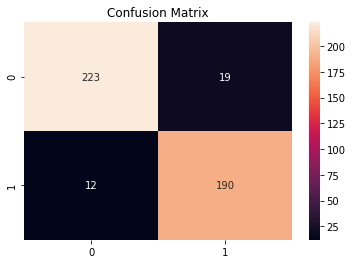

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Checking the 'SVM'

<h5>Hyper-parameter tuning</h5>

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [66]:
evaluation_metric=['accuracy']
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

for i in evaluation_metric:
    clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)
    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'kernel': 'rbf', 'gamma': 0.35143507365119386, 'C': 100}
SVC(C=100, gamma=0.35143507365119386)

0.9481981981981982


<h5>Training the model with kernel-RBF </h5>

In [67]:
clf = SVC(kernel='rbf',C=1000)  
clf.fit(x_train,y_train)

SVC(C=1000)

<h5>Predict</h5>

In [68]:
y_test_predict=clf.predict(x_test)

In [69]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [70]:
temp_data.head()

,y_test,y_test_pred
1375,0,0
101,1,1
1281,0,0
579,1,1
40,1,1


<h5>Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve</h5>

In [71]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.9391891891891891
0.9186602870813397
0.9401235578103264
0.9343065693430658
0.9504950495049505


In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[225  17]
 [ 10 192]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       242
           1       0.92      0.95      0.93       202

    accuracy                           0.94       444
   macro avg       0.94      0.94      0.94       444
weighted avg       0.94      0.94      0.94       444



In [73]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[225,  17],
       [ 10, 192]], dtype=int64)

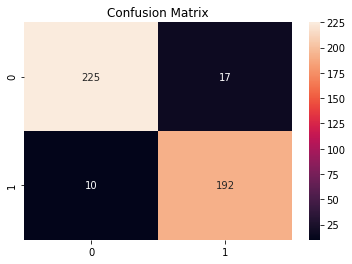

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

<h5>Training the model with Kernel-Linear</h5>

In [75]:
clf = SVC(kernel='linear',C=1000)  
clf.fit(x_train,y_train)

SVC(C=1000, kernel='linear')

<h5>Predict</h5>

In [76]:
y_test_predict=clf.predict(x_test)

In [77]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [78]:
temp_data.head()

,y_test,y_test_pred
1375,0,0
101,1,1
1281,0,0
579,1,0
40,1,1


<h5>Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve</h5>

In [79]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.7432432432432432
1.0
0.7178217821782178
0.6068965517241379
0.43564356435643564


In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[242   0]
 [114  88]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       242
           1       1.00      0.44      0.61       202

    accuracy                           0.74       444
   macro avg       0.84      0.72      0.71       444
weighted avg       0.83      0.74      0.72       444



In [81]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[242,   0],
       [114,  88]], dtype=int64)

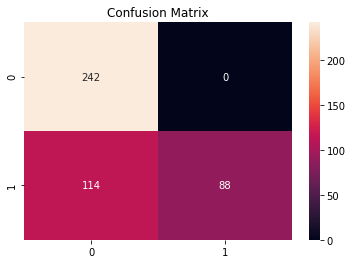

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

<h5>Conclusion</h5>

<h10>After training the dataset with the given Machine Learning model's : <br>
Looking at the confusion matrix, I came to know that KNN-with 97 percent and DecisionTree-with 94 percent stands best models for the given dataset.</h10>